## P1. Build Baseline model

Pascal P.  
Mar 2020  

- Course: *Introduction to Deep Learning & Neural Networks with Keras*
- Final Project: Build a Regression Model in Keras - Part 1 Baseline Model

<hr />

<hr />

#### Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:
- 1 hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error as the loss function.


1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

<hr />

### 1.1. Download, load and clean the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df_concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

df_concrete_data = pd.read_csv("./concrete_data.csv")
df_concrete_data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [3]:
# Any null value?
df_concrete_data.isnull().sum()

# ... No, good. 

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
#### A bit of EDA

# %matplotlib inline
# import seaborn as sns

# sns.pairplot(df_concrete_data)
# Observations?

### 1.2. Split data into predictors and target

In [5]:
conc_data_cols = df_concrete_data.columns
conc_data_cols

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [6]:
## Exclude columns 'Age', 'Strength' for predictors

df_predictors = df_concrete_data[df_concrete_data.columns.difference(['Age', 'Strength'])]
df_predictors.head()

,Blast Furnace Slag,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water
0,0.0,540.0,1040.0,676.0,0.0,2.5,162.0
1,0.0,540.0,1055.0,676.0,0.0,2.5,162.0
2,142.5,332.5,932.0,594.0,0.0,0.0,228.0
3,142.5,332.5,932.0,594.0,0.0,0.0,228.0
4,132.4,198.6,978.4,825.5,0.0,0.0,192.0


In [7]:
df_target = df_concrete_data['Strength'] 

In [8]:
n_cols = df_predictors.shape[1] 
n_cols # number of predictors

7

### 1.3. Build model with keras

In [9]:
import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
## Define regression model as a python function (which we can re-use later)

def regression_model(n_cols, nodes_per_hlayer=[10,], opt='adam', loss='mean_squared_error'):
    ## 1 - Create model
    model = Sequential()
    for ix, num_nodes in enumerate(nodes_per_hlayer):
      if ix == 0: # first layer
        model.add(Dense(num_nodes, activation='relu', input_shape=(n_cols,)))
      else:
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(1)) # output layer
    
    ## 2 - Compile model
    model.compile(optimizer=opt, loss=loss, metrics=[loss])
    return model

In [11]:
from sklearn.model_selection import train_test_split

## Define train/test split wrapper function 

def split_data(df_pred, df_target, test_size=0.3, random_state=6776):
  X_train, X_test, y_train, y_test = train_test_split(df_pred, df_target, 
                                                      test_size=test_size, 
                                                      random_state=random_state)
  return (X_train, X_test, y_train, y_test) # tuple

### 1.4. Instanciate the model

In [12]:
## as per spec n_cols input, 10 nodes in only 1 layer (array of length 1)
model = regression_model(n_cols, nodes_per_hlayer=[10])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


### 1.5. Train and evaluate the model

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
## Main Train/Eval loop - 50 iterations

N = 50
mse_ary = []

for ix in range(0, N):
  ## Reset model => reset the weigths
  model = regression_model(n_cols, nodes_per_hlayer=[10])
  
  ## Split the data into train and test set using opur wrapper function
  X_train, X_test, y_train, y_test = split_data(df_predictors, df_target)

  ## Fit the model no validation split
  _history = model.fit(X_train, y_train, 
                       epochs=50, 
                       verbose=0)
    
  ## Make Predictions
  pred = model.predict(X_test)
  
  ## Compare to ground truth
  mse = mean_squared_error(y_test, pred)
  print("Iteration: {:2d} / MSE: {:1.5f}".format(ix, mse))
  
  ## Keep it for later
  mse_ary.append(mse)

W0322 11:26:29.746470 139735613523776 deprecation_wrapper.py:119] From /home/pascal/Projects/ML_DL/anaconda3/envs/tensorflow_keras_gpuenv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iteration:  0 / MSE: 208.94951
Iteration:  1 / MSE: 210.50744
Iteration:  2 / MSE: 190.81275
Iteration:  3 / MSE: 206.24870
Iteration:  4 / MSE: 189.51954
Iteration:  5 / MSE: 179.67480
Iteration:  6 / MSE: 183.72541
Iteration:  7 / MSE: 1634.82257
Iteration:  8 / MSE: 314.23681
Iteration:  9 / MSE: 227.07544
Iteration: 10 / MSE: 182.39488
Iteration: 11 / MSE: 468.30551
Iteration: 12 / MSE: 214.51967
Iteration: 13 / MSE: 337.41017
Iteration: 14 / MSE: 443.29441
Iteration: 15 / MSE: 187.04362
Iteration: 16 / MSE: 256.60725
Iteration: 17 / MSE: 703.58446
Iteration: 18 / MSE: 1001.16135
Iteration: 19 / MSE: 308.55933
Iteration: 20 / MSE: 224.18897
Iteration: 21 / MSE: 183.10188
Iteration: 22 / MSE: 1045.57920
Iteration: 23 / MSE: 831.66355
Iteration: 24 / MSE: 221.46654
Iteration: 25 / MSE: 188.33838
Iteration: 26 / MSE: 269.85487
Iteration: 27 / MSE: 189.33435
Iteration: 28 / MSE: 187.95042
Iteration: 29 / MSE: 2164.59753
Iteration: 30 / MSE: 194.71530
Iteration: 31 / MSE: 195.90174
Iter

In [15]:
## Summary

print("Summary baseline model: ")
np_ary = np.array(mse_ary, dtype=np.float64)

## NOTE: using unbiased std - which means diving by N-1 (where N is the size of sample here 50)
##       just in case, added biased std.
print("mean(MSE): {:2.5f} / unbiased std(MSE): {:2.5f} / biased std(MSE): {:2.5f}"\
      .format(np.mean(np_ary), np.std(np_ary, ddof=1), np.std(np_ary, ddof=0)))

Summary baseline model: 
mean(MSE): 424.12976 / unbiased std(MSE): 415.68499 / biased std(MSE): 411.50715


#### Optional

In [16]:
ix_max = np_ary.argmax()
ix_min = np_ary.argmin()

print("max: {:2.5f} at epoch: {:2d} / min: {:2.5f} at epoch: {:2d}"\
      .format(np_ary[ix_max], ix_max, np_ary[ix_min], ix_min))


max: 2164.59753 at epoch: 29 / min: 179.67480 at epoch:  5


In [17]:
df_ = pd.DataFrame(np_ary, columns=['mse_01_bl'])
df_.head()

,mse_01_bl
0,208.949511
1,210.507436
2,190.812754
3,206.248697
4,189.519537


In [18]:
df_.to_csv('01_baseline_model.csv', sep=',', encoding='utf-8',  index=False)

Text(0, 0.5, 'MSE')

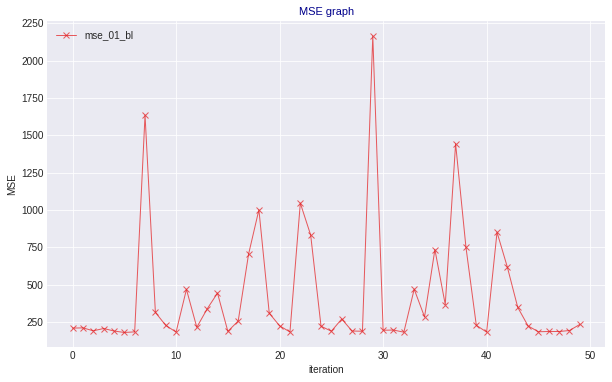

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 6))

# style
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
ixes = list(range(0, df_.shape[0]))
ix = 0
plt.plot(ixes, df_['mse_01_bl'], marker='x', color=palette(ix), linewidth=1, alpha=0.7, 
         label=df_.columns[ix])

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("MSE graph", loc='center', fontsize=11, fontweight=0, color='darkblue')
plt.xlabel("iteration")
plt.ylabel("MSE")